In [95]:
import os  
import scipy.io
import numpy as np
import pandas as pd



from icecream import ic


from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,mean_squared_error,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import scipy.io
import matplotlib.pyplot as plt

from tensorly.decomposition import parafac
import tensorly as tl


# from TKL import TKL
from KL import KL

from utils import *

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorly.decomposition import parafac
import tensorly as tl


from KL import KL
from utils import *

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from icecream import ic
import matplotlib.pyplot as plt
  
      
def classify_kernel(K,K_y,Z):
  train_index, val_index, test_index = Z[0,0],Z[0,1],Z[0,2] 
  train_index = np.hstack([train_index, val_index]).ravel().astype(int)
  test_index = test_index.ravel().astype(int)
  
  K = K/ np.sqrt(np.linalg.norm(K))
  K_train = K[np.ix_(train_index, train_index)]
  K_test = K[np.ix_(test_index,train_index)]
  y = K_y[0,:]
  y_train = y[train_index]
  y_test = y[test_index]


  clf = SVC(kernel='precomputed') 
  clf.fit(K_train, y_train)
  y_pred_late = clf.predict(K_test)
  accuracy_late = accuracy_score(y_test, y_pred_late)
  ic(accuracy_late)
  y_combine = np.hstack([y_train,y_pred_late])
  return y_combine



ic| 'TKL + DP ***********'
ic| accuracy_late: 0.9787234042553191
ic| 'Summation ***********'
ic| accuracy_late: 0.9148936170212766


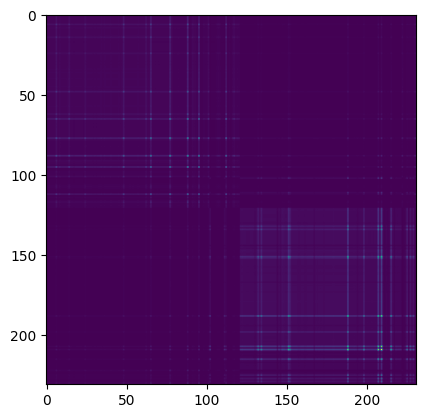

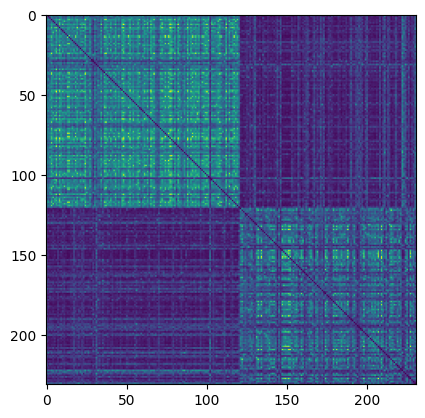

In [10]:
exp = 1
mat_file_path = fr"D:/Code-git/DeepKernelLearning/ADvsCN/K_X_{exp}.mat"
mat_data = scipy.io.loadmat(mat_file_path)

K_X = np.copy(mat_data['K_X'])
K_y = np.squeeze(mat_data['K_y'])
Z = mat_data['Z']

K_X_copy = np.copy(K_X)
K_ten = parafac(K_X_copy, rank=2, tol=1e-9,n_iter_max=1000,init='random')
K_ten = tl.cp_to_tensor(K_ten)

K_ten_dp = cross_diffusion(K_ten,3,5)
K = np.sum(K_ten_dp, axis=0)
ic("TKL + DP ***********")
classify_kernel(K,K_y,Z)
plt.imshow(K)


K = np.sum(mat_data['K_X'], axis=0)
ic("Summation ***********")
classify_kernel(K,K_y,Z)
plt.figure()
plt.imshow(K)

ic| 'Without DP ***********'
ic| accuracy_late: 0.8297872340425532


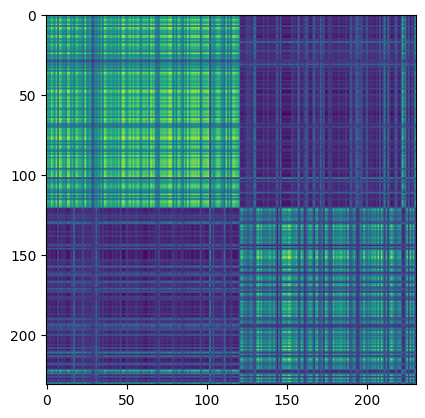

In [9]:
K = np.sum(K_ten, axis=0)
ic("Without DP ***********")
classify_kernel(K,K_y,Z)
plt.figure()
plt.imshow(K)

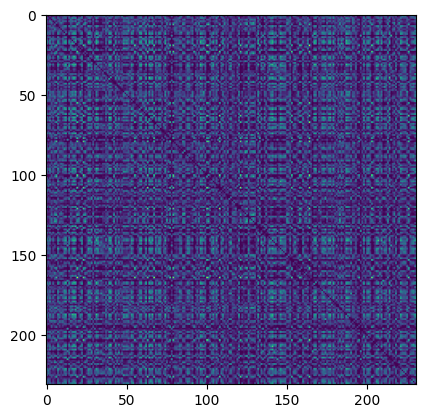

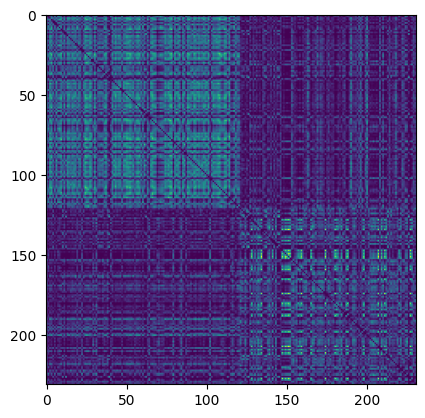

In [57]:
import random
K_X_ = np.copy(K_X)

N = K_ten.shape[1]
idx_list_origin = list(range(N))
shuffle_idx = list(range(N))
np.array(random.shuffle(shuffle_idx)).ravel()
inverse_idx = np.argsort(shuffle_idx)

K_ten_shuffle = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle[i,:,:] = np.squeeze(K_X_[i,:,:])[np.ix_(shuffle_idx,shuffle_idx)]
plt.imshow(K_ten_shuffle[0,:,:])


K_ten_shuffle_inverse = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle_inverse[i,:,:] = np.squeeze(K_ten_shuffle[i,:,:])[np.ix_(inverse_idx,inverse_idx)]
plt.figure()
plt.imshow(K_ten_shuffle_inverse[0,:,:])



ic| ' ***********'
ic| accuracy_late: 0.9787234042553191


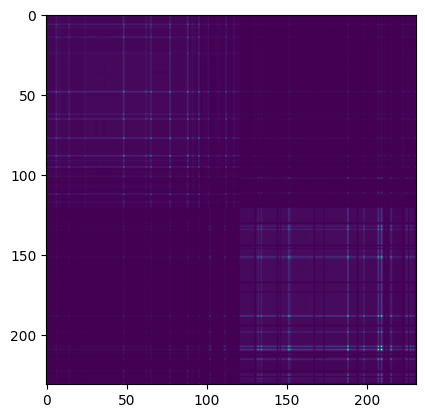

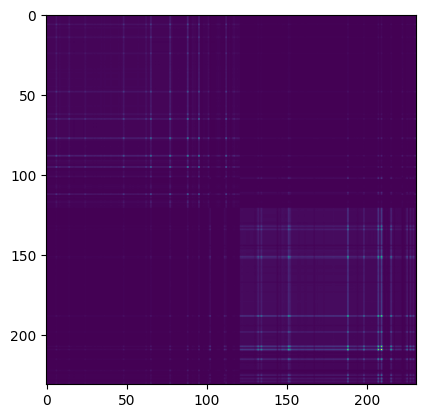

In [61]:
K_ten = parafac(K_X_, rank=2, tol=1e-9,n_iter_max=1000,init='random')
K_ten = np.copy(tl.cp_to_tensor(K_ten))
K_ten = cross_diffusion(K_ten,3,5)

K_ten_dp = np.zeros_like(K_ten)
for i in range(4):
    K_ten_dp[i,:,:] = np.squeeze(K_ten[i,:,:])
plt.figure()
plt.imshow(K_ten_dp[0,:,:])

K = np.sum(K_ten_dp, axis=0)
ic(" ***********")
classify_kernel(K,K_y,Z)
plt.figure()
plt.imshow(K)

ic| ' ***********'
ic| accuracy_late: 0.8723404255319149


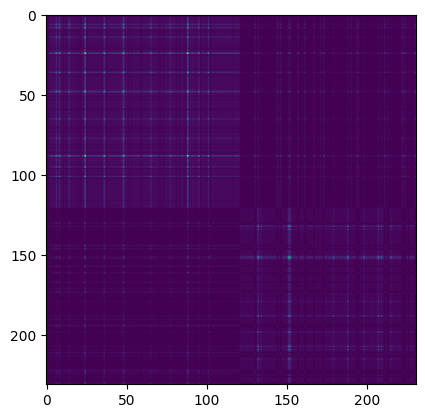

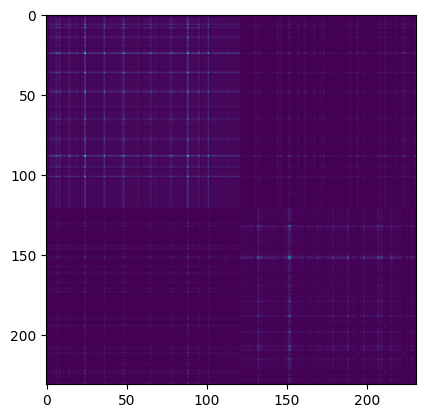

In [73]:
N = K_ten.shape[1]
idx_list_origin = list(range(N))
shuffle_idx = list(range(N))
np.array(random.shuffle(shuffle_idx)).ravel()
inverse_idx = np.argsort(shuffle_idx)

K_ten_shuffle = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle[i,:,:] = np.squeeze(K_X_[i,:,:])[np.ix_(shuffle_idx,shuffle_idx)]
# plt.imshow(K_ten_shuffle[0,:,:])


K_ten = parafac(K_ten_shuffle, rank=2, tol=1e-9,n_iter_max=1000,init='random')
K_ten = tl.cp_to_tensor(K_ten)
K_ten = cross_diffusion(np.copy(K_ten),3,5)



K_ten_shuffle_sorted = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle_sorted[i,:,:] = np.squeeze(K_ten[i,:,:])[np.ix_(inverse_idx,inverse_idx)]
    
plt.figure()
plt.imshow(K_ten_shuffle_sorted[0,:,:])


K = np.sum(K_ten_shuffle_sorted, axis=0)
ic(" ***********")
classify_kernel(K,K_y,Z)
plt.figure()
plt.imshow(K)

ic| accuracy_late: 0.9148936170212766


[115 117 118 119 120 121 122 123 124 125]


ic| ' ***********'
ic| accuracy_late: 0.8297872340425532


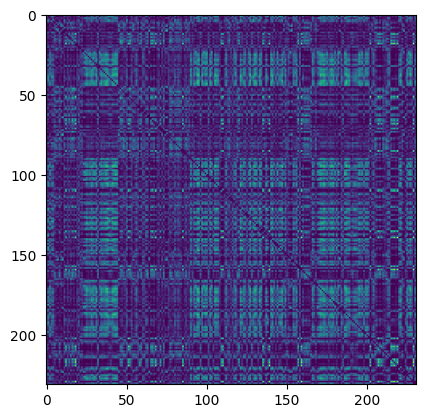

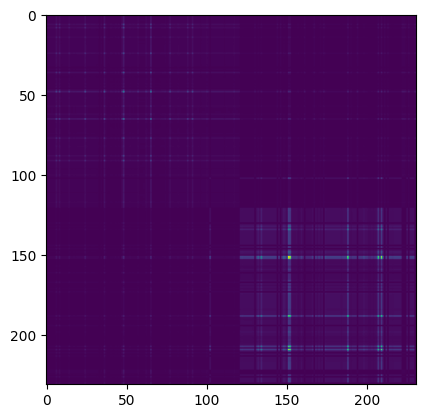

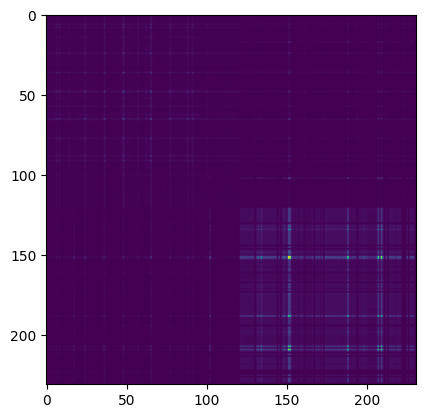

In [91]:

y_combine = classify_kernel(np.sum(K_X,axis=0),K_y,Z)
shuffle_idx = np.argsort(y_combine)
inverse_idx = np.argsort(shuffle_idx)
print(shuffle_idx[:10])

K_ten_shuffle = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle[i,:,:] = np.squeeze(K_X_[i,:,:])[np.ix_(shuffle_idx,shuffle_idx)]
plt.figure()
plt.imshow(K_ten_shuffle[0,:,:])


K_ten = parafac(K_ten_shuffle, rank=2, tol=1e-9,n_iter_max=1000,init='random')
K_ten = tl.cp_to_tensor(K_ten)
K_ten = cross_diffusion(np.copy(K_ten),3,5)



K_ten_shuffle_sorted = np.zeros_like(K_ten)
for i in range(4):
    K_ten_shuffle_sorted[i,:,:] = np.squeeze(K_ten[i,:,:])[np.ix_(inverse_idx,inverse_idx)]
    
plt.figure()
plt.imshow(K_ten_shuffle_sorted[0,:,:])


K = np.sum(K_ten_shuffle_sorted, axis=0)
ic(" ***********")
classify_kernel(K,K_y,Z)
plt.figure()
plt.imshow(K)

In [92]:
y_combine = classify_kernel(np.sum(K_X,axis=0),K_y,Z)
shuffle_idx = np.argsort(y_combine)
inverse_idx = np.argsort(shuffle_idx)
print(shuffle_idx[:10])

ic| accuracy_late: 0.9148936170212766


[115 117 118 119 120 121 122 123 124 125]


In [93]:
y_combine

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

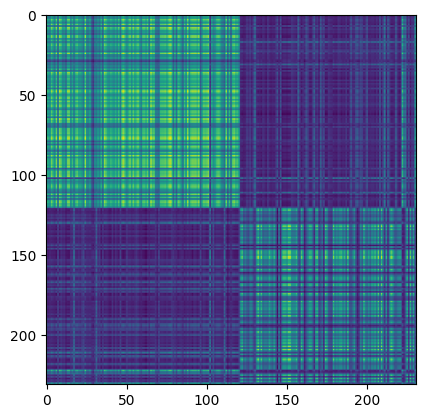

In [26]:

plt.imshow(K_ten_shuffle[0,:,:][np.ix_(inverse_idx,inverse_idx)])